In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display
df_raw = pd.read_csv('part3.csv')

# Work Flow

### Data Cleaning: 
Takes the most time, but every second spent here is worth it. The cleaner your data gets through this step, the lesser would your total time spent would be.
### Splitting the data set: 
The data set would be splitted into training and testing sets, which would be used for the modelling and prediction purposes respectively. In addition, an additional split as a cross-validation set would also need to be done.
### Transformation and Reduction:
Involves processes like transformations, mean and median scaling, etc.
### Feature Selection:
This can be done in a lot of ways like threshold selection, subset selection, etc.
### Designing predictive model:
Design the predictive model on the training data depending on the features you have at hand.
### Cross Validation:
Final Prediction, Validation


### Look at data to familiarize

In [26]:
print 'Columns: ', df_raw.columns
print 'Shape: ',df_raw.shape
df_raw.describe()

Columns:  Index([u'order_date', u'category_name', u'product_name', u'order_sequence',
       u'revenue', u'units', u'customer_id', u'order_id'],
      dtype='object')
Shape:  (89636, 8)


,order_sequence,revenue,units,customer_id,order_id
count,89636.000000,89636.000000,89636.000000,8.963600e+04,8.963600e+04
mean,4.456123,19.523892,22.709637,4.951769e+07,4.528632e+14
std,6.331564,35.721153,62.664103,2.879722e+07,3.075394e+14
min,1.000000,-206.150000,0.000000,8.656000e+03,6.736700e+04
25%,1.000000,3.935735,1.000000,2.427273e+07,1.780030e+14
50%,2.000000,7.990000,1.000000,4.898846e+07,4.443070e+14
75%,5.000000,23.380000,13.000000,7.419158e+07,7.167750e+14
max,93.000000,2761.990000,2974.000000,9.999470e+07,9.999470e+14


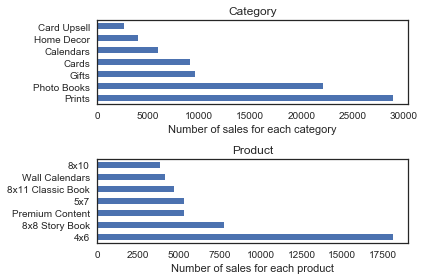

In [27]:
plt.subplot(2,1,1)
plt.title('Category')
pd.Series.value_counts(df_raw['category_name']).head(7).plot(kind = 'barh')
plt.xlabel('Number of sales for each category')
plt.subplot(2,1,2)
plt.title('Product')
pd.Series.value_counts(df_raw['product_name']).head(7).plot(kind = 'barh')
plt.xlabel('Number of sales for each product')
plt.tight_layout()

top_categories = pd.Series.value_counts(df_raw['category_name']).head(7).index.tolist()
top_products = pd.Series.value_counts(df_raw['product_name']).head(7).index.tolist()


In [28]:
null_vals = {}
for column in df_raw.columns:
    null_vals.update({column:sum(pd.isnull(df_raw[column]))})
print null_vals

{'order_id': 0, 'order_sequence': 0, 'revenue': 0, 'units': 0, 'order_date': 0, 'customer_id': 0, 'product_name': 0, 'category_name': 0}


#### There are no NULL values

In [29]:
df_raw['category_name'] = df_raw['category_name'].astype('category')

In [30]:
first_order_date, last_order_date = df_raw.order_date.sort_values().iloc[0], df_raw.order_date.sort_values().iloc[-1]
print('First order was on: %s. Last order was on: %s' % (first_order_date, last_order_date))

First order was on: 1-Apr-14. Last order was on: 9-Sep-15


#### Set date as dataframe index and sort

In [31]:
order_date_formatted = pd.to_datetime(df_raw['order_date'], format='%d-%b-%y')
df_raw = df_raw.drop('order_date',1)
df_raw['order_date'] = order_date_formatted
df = df_raw.set_index('order_date').sort_index()
print 'Data Types: ',df.dtypes    

Data Types:  category_name     category
product_name        object
order_sequence       int64
revenue            float64
units                int64
customer_id          int64
order_id           float64
dtype: object


In [32]:
display(df)

,category_name,product_name,order_sequence,revenue,units,customer_id,order_id
order_date,,,,,,,
2014-01-01,Photo Books,8x11 Classic Book,1,147.580000,2,6304259,6.304260e+13
2014-01-01,Cards,4.25x5.5 Stationery Cards,1,17.470000,12,46668787,4.666880e+14
2014-01-01,Prints,4x6,1,5.070000,59,64485141,6.448510e+14
2014-01-01,Photo Books,Premium Content,1,4.990000,0,64485141,6.448510e+14
2014-01-01,Photo Books,10x10 Photo Book,1,22.890000,1,64485141,6.448510e+14
2014-01-01,Photo Books,8x11 Classic Book,1,15.490000,1,36087879,3.608790e+14
2014-01-01,Photo Books,Premium Content,1,4.990000,0,36087879,3.608790e+14
2014-01-01,Prints,4x6,1,18.720000,206,52824318,5.282430e+14
2014-01-01,Photo Books,Premium Content,1,4.990000,0,35161934,3.516190e+14


In [33]:
df_raw.dtypes

category_name           category
product_name              object
order_sequence             int64
revenue                  float64
units                      int64
customer_id                int64
order_id                 float64
order_date        datetime64[ns]
dtype: object

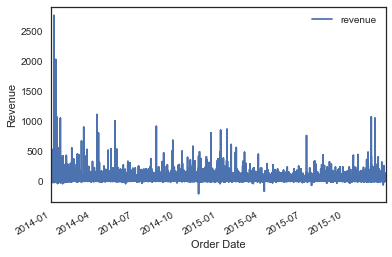

In [34]:
ax = df.plot(x = df.index, y = 'revenue')
ax.set_xlabel('Order Date')
ax.set_ylabel('Revenue')


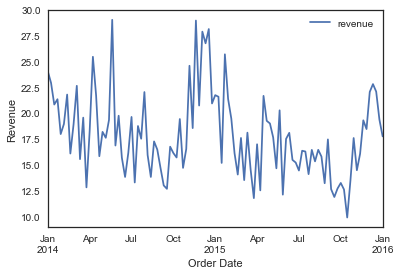

In [35]:
df_m = df.resample('W').mean()
ax = df_m.plot(x = df_m.index, y = 'revenue')
ax.set_xlabel('Order Date')
ax.set_ylabel('Revenue')


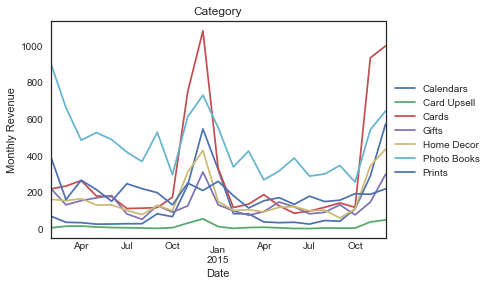

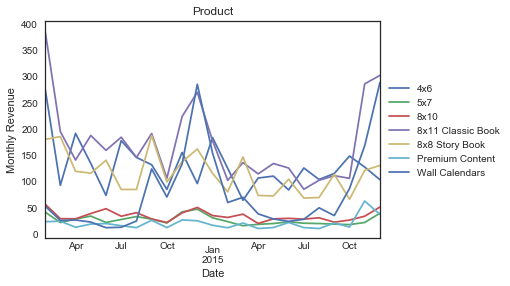

In [36]:
df_g = df.reset_index().groupby(['order_date','category_name'], as_index = False).sum()
order_date_formatted = pd.to_datetime(df_g['order_date'], format='%d-%b-%y')
df_g['order_date'] = order_date_formatted
fig, ax = plt.subplots()
for key, data in df_g.groupby('category_name'):
    if key in top_categories:
        data_resampled = data[data['order_date'] > '2014-01-31'].set_index('order_date').resample('M').mean()
        data_resampled.plot(x=data_resampled.index, y='revenue', ax=ax, label=key)        
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left', ncol=1)
plt.title('Category')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')

df_g = df.reset_index().groupby(['order_date','product_name'], as_index = False).sum()
order_date_formatted = pd.to_datetime(df_g['order_date'], format='%d-%b-%y')
df_g['order_date'] = order_date_formatted
fig, ax = plt.subplots()
for key, data in df_g.groupby('product_name'):
    if key in top_products:
        data_resampled = data[data['order_date'] > '2014-01-31'].set_index('order_date').resample('M').mean()
        data_resampled.plot(x=data_resampled.index, y='revenue', ax=ax, label=key)        
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left', ncol=1)
plt.title('Product')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')

## Cohort Analysis

In [37]:
df.head()

,category_name,product_name,order_sequence,revenue,units,customer_id,order_id
order_date,,,,,,,
2014-01-01,Photo Books,8x11 Classic Book,1,147.58,2,6304259,6.304260e+13
2014-01-01,Cards,4.25x5.5 Stationery Cards,1,17.47,12,46668787,4.666880e+14
2014-01-01,Prints,4x6,1,5.07,59,64485141,6.448510e+14
2014-01-01,Photo Books,Premium Content,1,4.99,0,64485141,6.448510e+14
2014-01-01,Photo Books,10x10 Photo Book,1,22.89,1,64485141,6.448510e+14


In [38]:
columns_to_keep = ['customer_id', 'order_id', 'category_name']
dfs = df[columns_to_keep].reset_index()
#dfs['order_period'] = dfs.order_date.apply(lambda x: str(x.year)+'q'+str(x.quarter))
dfs['order_period'] = dfs.order_date.apply(lambda x: x.strftime('%Y-%m'))
dfs.head()

,order_date,customer_id,order_id,category_name,order_period
0,2014-01-01,6304259,6.304260e+13,Photo Books,2014-01
1,2014-01-01,46668787,4.666880e+14,Cards,2014-01
2,2014-01-01,64485141,6.448510e+14,Prints,2014-01
3,2014-01-01,64485141,6.448510e+14,Photo Books,2014-01
4,2014-01-01,64485141,6.448510e+14,Photo Books,2014-01


In [39]:
dfs.set_index('customer_id', inplace=True)
dfs['cohort_group'] = dfs.groupby(level=0)['order_date'].min().apply(lambda x: x.strftime('%Y-%m'))
dfs.reset_index(inplace=True)
dfs

,customer_id,order_date,order_id,category_name,order_period,cohort_group
0,6304259,2014-01-01,6.304260e+13,Photo Books,2014-01,2014-01
1,46668787,2014-01-01,4.666880e+14,Cards,2014-01,2014-01
2,64485141,2014-01-01,6.448510e+14,Prints,2014-01,2014-01
3,64485141,2014-01-01,6.448510e+14,Photo Books,2014-01,2014-01
4,64485141,2014-01-01,6.448510e+14,Photo Books,2014-01,2014-01
5,36087879,2014-01-01,3.608790e+14,Photo Books,2014-01,2014-01
6,36087879,2014-01-01,3.608790e+14,Photo Books,2014-01,2014-01
7,52824318,2014-01-01,5.282430e+14,Prints,2014-01,2014-01
8,35161934,2014-01-01,3.516190e+14,Photo Books,2014-01,2014-01
9,35161934,2014-01-01,3.516190e+14,Photo Books,2014-01,2014-01


In [40]:
grouped = dfs.groupby(['cohort_group', 'order_period'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'customer_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique
                       })

# make the column names more meaningful
cohorts.rename(columns={'customer_id': 'total_users',
                        'order_id': 'total_orders'}, inplace=True)
cohorts

total_orders  total_users
cohort_group order_period                           
2014-01      2014-01            21975.0        22036
             2014-02             1739.0         1720
             2014-03             1473.0         1447
             2014-04             1158.0         1144
             2014-05             1209.0         1182
             2014-06             1185.0         1161
             2014-07             1014.0          997
             2014-08              902.0          888
             2014-09             1303.0         1257
             2014-10              855.0          840
             2014-11             1583.0         1549
             2014-12             1951.0         1917
             2015-01             1528.0         1500
             2015-02              876.0          859
             2015-03              946.0          922
             2015-04              757.0          741
             2015-05              983.0          940
             2015-06              867.0          842
             2015-07              790.0          769
             2015-08              818.0          786
             2015-09             1009.0          977
             2015-10              884.0          858
             2015-11             1570.0         1524
             2015-12             1782.0         1754

In [41]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    """
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts

total_orders  total_users  cohort_period
cohort_group order_period                                          
2014-01      2014-01            21975.0        22036              1
             2014-02             1739.0         1720              2
             2014-03             1473.0         1447              3
             2014-04             1158.0         1144              4
             2014-05             1209.0         1182              5
             2014-06             1185.0         1161              6
             2014-07             1014.0          997              7
             2014-08              902.0          888              8
             2014-09             1303.0         1257              9
             2014-10              855.0          840             10
             2014-11             1583.0         1549             11
             2014-12             1951.0         1917             12
             2015-01             1528.0         1500             13
             2015-02              876.0          859             14
             2015-03              946.0          922             15
             2015-04              757.0          741             16
             2015-05              983.0          940             17
             2015-06              867.0          842             18
             2015-07              790.0          769             19
             2015-08              818.0          786             20
             2015-09             1009.0          977             21
             2015-10              884.0          858             22
             2015-11             1570.0         1524             23
             2015-12             1782.0         1754             24

In [42]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['total_users'].groupby(level=0).first()
cohort_group_size.head()

cohort_group
2014-01    22036
Name: total_users, dtype: int64

In [43]:
cohorts['total_users'].head()

cohort_group  cohort_period
2014-01       1                22036
              2                 1720
              3                 1447
              4                 1144
              5                 1182
Name: total_users, dtype: int64

In [44]:
cohorts['total_users'].unstack(0).head()

cohort_group,2014-01
cohort_period,
1,22036
2,1720
3,1447
4,1144
5,1182


In [45]:
user_retention = cohorts['total_users'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

cohort_group,2014-01
cohort_period,
1,1.000000
2,0.078054
3,0.065665
4,0.051915
5,0.053639
6,0.052687
7,0.045244
8,0.040298
9,0.057043


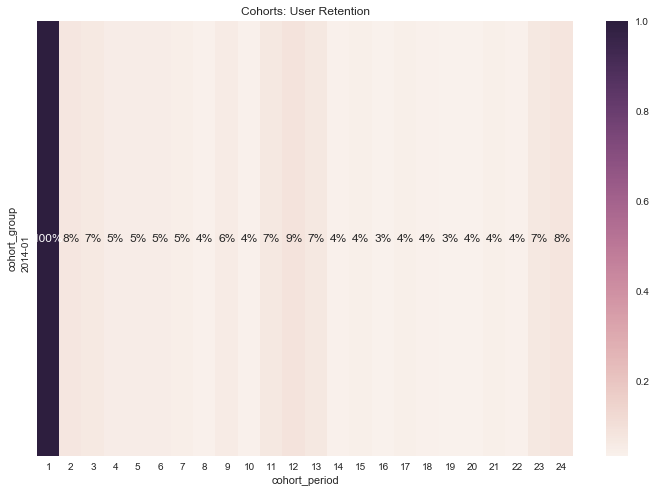

In [46]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [47]:
df[:'2014-12-31'].tail()

,category_name,product_name,order_sequence,revenue,units,customer_id,order_id
order_date,,,,,,,
2014-12-31,Calendars,Large Calendars,2,11.99000,1,94029743,9.402970e+14
2014-12-31,Prints,5x7,4,4.13742,3,33422833,3.342283e+07
2014-12-31,Photo Books,10x10 Photo Book,2,16.90000,1,16305106,1.630510e+14
2014-12-31,Photo Books,8x8 Story Book,4,7.99000,1,79368833,7.936880e+14
2014-12-31,Photo Books,Premium Content,2,4.99000,0,16305106,1.630510e+14


In [51]:
order_sequence = df[:'2014-12-31'].groupby('customer_id')['order_sequence'].max().to_frame()
retained_customers = order_sequence[order_sequence['order_sequence']>1]
print len(retained_customers)/float(len(df))


0.0970703735106


In [52]:
print retained_customers.index

Int64Index([    8656,    32261,    38174,    61848,    67367,    68467,
               90609,   113746,   121791,   133003,
            ...
            99856619, 99888054, 99913912, 99941705, 99942269, 99950328,
            99953660, 99957620, 99971694, 99992967],
           dtype='int64', name=u'customer_id', length=8701)


## Predictive Model

In [53]:
columns_to_drop = ['order_id','product_name']#,'category_name']
dfs = df.drop(columns_to_drop,1)
df_dummies = pd.get_dummies(dfs)
df_dummies['order_day'] = df_dummies.index.to_series().dt.day
df_dummies['order_week'] = df_dummies.index.to_series().dt.week
df_dummies['order_month'] = df_dummies.index.to_series().dt.month
df_dummies['order_quarter'] = df_dummies.index.to_series().dt.quarter
df_dummies['order_year'] = df_dummies.index.to_series().dt.year

df_data = df_dummies.reset_index().set_index('customer_id')
df_data['customer_retained'] = 0
df_data.loc[retained_customers.index,'customer_retained'] = 1
columns_to_drop = ['order_date']#,'order_sequence']
df_data = df_data.drop(columns_to_drop,1)
display(df_data.head())
print(df_data.shape)
print(sum(df_data['customer_retained']))


,order_sequence,revenue,units,category_name_Calendars,category_name_Card Upsell,category_name_Cards,category_name_Gifts,category_name_Home Decor,category_name_Large Formats,category_name_OTHER,...,category_name_Shipping,category_name_Stationery,category_name_Unassigned,category_name_Yearbooks,order_day,order_week,order_month,order_quarter,order_year,customer_retained
customer_id,,,,,,,,,,,,,,,,,,,,,
6304259,1,147.58,2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1
46668787,1,17.47,12,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,0
64485141,1,5.07,59,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1
64485141,1,4.99,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1
64485141,1,22.89,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1


(89636, 24)
64532


In [54]:
df_data.head()

,order_sequence,revenue,units,category_name_Calendars,category_name_Card Upsell,category_name_Cards,category_name_Gifts,category_name_Home Decor,category_name_Large Formats,category_name_OTHER,...,category_name_Shipping,category_name_Stationery,category_name_Unassigned,category_name_Yearbooks,order_day,order_week,order_month,order_quarter,order_year,customer_retained
customer_id,,,,,,,,,,,,,,,,,,,,,
6304259,1,147.58,2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1
46668787,1,17.47,12,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,0
64485141,1,5.07,59,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1
64485141,1,4.99,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1
64485141,1,22.89,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2014,1


[ True  True  True  True False False  True False False False False  True
 False False False  True False False False  True  True  True  True]
Score with all features: 0.822973
[[ 5743   439]
 [ 3528 12699]]
Score with only selected features: 0.823955
[[ 5753   429]
 [ 3516 12711]]


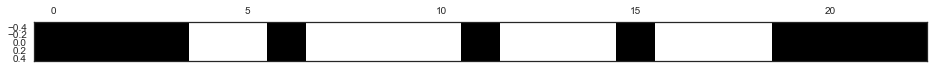

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

feature_names = df_data.iloc[:,0:-1].columns.tolist()
X = df_data.iloc[:,0:-1].as_matrix()
y = df_data.iloc[:,-1].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

# transform test data:
X_test_l1 = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: %f" % lr.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
confusion_lr = confusion_matrix(y_test, y_pred)
print(confusion_lr)

lr.fit(X_train_l1, y_train)
print("Score with only selected features: %f" % lr.score(X_test_l1, y_test))
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test_l1)
confusion_lr = confusion_matrix(y_test, y_pred)
print(confusion_lr)


In [58]:
print('Kept Features:')
print('--------------')

for feature_list_index in select.get_support(indices=True):
    print(feature_names[feature_list_index])


Kept Features:
--------------
order_sequence
revenue
units
category_name_Calendars
category_name_Gifts
category_name_Photo Books
category_name_Stationery
order_week
order_month
order_quarter
order_year


Score with all features: 0.830336
accuracy on training set: 0.832969
accuracy on test set: 0.830336
Score with only selected features: 0.830291
accuracy on training set: 0.832151
accuracy on test set: 0.830291


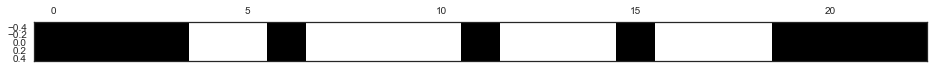

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

feature_names = df_dummies.iloc[:,0:-1].columns.tolist()
X = df_data.iloc[:,0:-1].as_matrix()
y = df_data.iloc[:,-1].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=20), threshold='median')
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_l1 = select.transform(X_train)

mask = select.get_support()
#print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

# transform test data:
X_test_l1 = select.transform(X_test)
gbc = GradientBoostingClassifier(random_state=0, n_estimators=300, learning_rate=0.1)
gbc.fit(X_train, y_train)
print("Score with all features: %f" % gbc.score(X_test, y_test))
print("accuracy on training set: %f" % gbc.score(X_train, y_train))
print("accuracy on test set: %f" % gbc.score(X_test, y_test))

gbc.fit(X_train_l1, y_train)
print("Score with only selected features: %f" % gbc.score(X_test_l1, y_test))
print("accuracy on training set: %f" % gbc.score(X_train_l1, y_train))
print("accuracy on test set: %f" % gbc.score(X_test_l1, y_test))

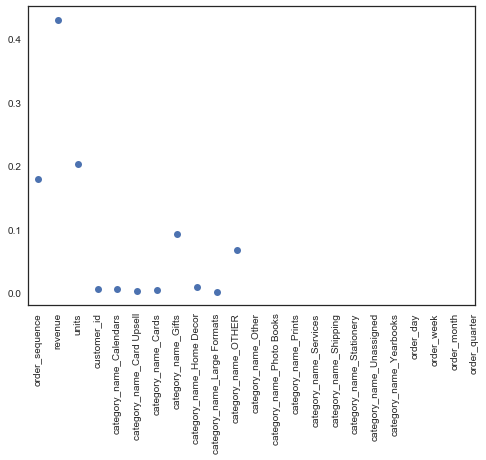

In [60]:

plt.plot(gbc.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), feature_names, rotation=90);

In [61]:
from sklearn.metrics import confusion_matrix
y_pred = gbc.predict(X_test_l1)
confusion_gbc = confusion_matrix(y_test, y_pred)
print(confusion_gbc)


[[ 5535   647]
 [ 3156 13071]]


[ True  True  True  True False False  True False False False False  True
 False False False  True False False False  True  True  True  True]
Score with all features: 0.821277
[[ 5867   315]
 [ 3690 12537]]
Score with only selected features: 0.821277
[[ 5867   315]
 [ 3690 12537]]


NameError: name 'feature_importances' is not defined

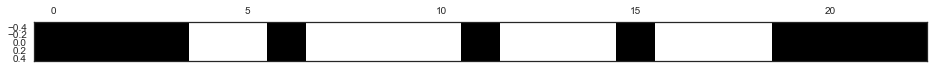

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

feature_names = df_data.iloc[:,0:-1].columns.tolist()
X = df_data.iloc[:,0:-1].as_matrix()
y = df_data.iloc[:,-1].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

# transform test data:
X_test_l1 = select.transform(X_test)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
print("Score with all features: %f" % svc.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test)
confusion_svc = confusion_matrix(y_test, y_pred)
print(confusion_svc)

svc.fit(X_train_l1, y_train)
print("Score with only selected features: %f" % svc.score(X_test_l1, y_test))
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test_l1)
confusion_svc = confusion_matrix(y_test, y_pred)
print(confusion_svc)



Confusion matrix, without normalization
[[ 5753   429]
 [ 3516 12711]]


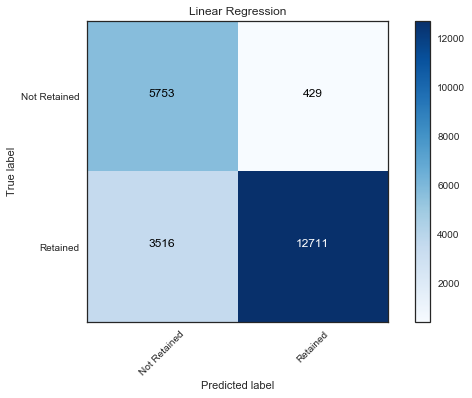

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_lr, classes=['Not Retained','Retained'], normalize=False,
                      title='Normalized confusion matrix')
plt.title('Linear Regression')

Confusion matrix, without normalization
[[ 5867   315]
 [ 3690 12537]]


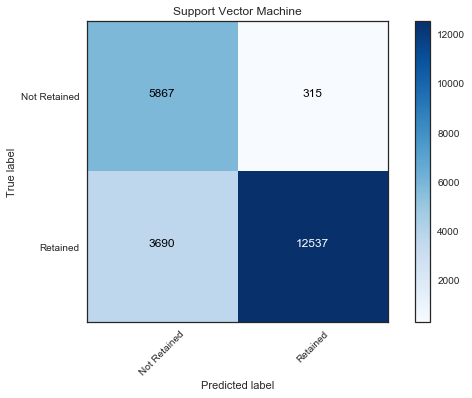

In [84]:
plot_confusion_matrix(confusion_svc, classes=['Not Retained','Retained'], normalize=False,
                      title='Normalized confusion matrix')
plt.title('Support Vector Machine')

Confusion matrix, without normalization
[[ 5535   647]
 [ 3156 13071]]


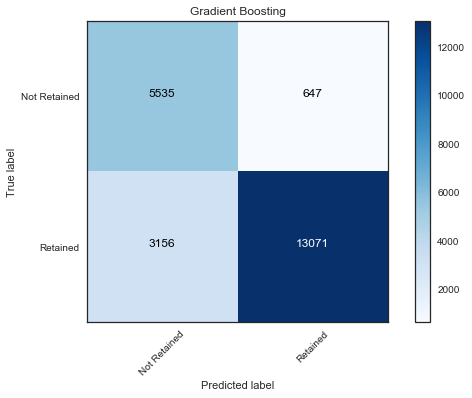

In [85]:
plot_confusion_matrix(confusion_gbc, classes=['Not Retained','Retained'], normalize=False,
                      title='Normalized confusion matrix')
plt.title('Gradient Boosting')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

feature_names = df_dummies.iloc[:,0:-1].columns.tolist()
X = df_data.iloc[:,0:-1].as_matrix()
y = df_data.iloc[:,-1].as_matrix()
      
# Grid Search
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [100, 200, 300, 400, 500]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
gbc = GradientBoostingClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(gbc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





In [ ]:
from sklearn.metrics import roc_auc_score
# alternative metric to optimize over grid parameters: AUC

y_decision_fn_scores_auc = grid_result.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_search.best_params_)
print('Grid best score (AUC): ', grid_search.best_score_)